Logistic Regression Accuracy: 0.9197
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       531
           1       0.93      0.87      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921

Random Forest Accuracy: 0.9555
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       531
           1       0.97      0.92      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.95       921
weighted avg       0.96      0.96      0.96       921

SVM Accuracy: 0.9349
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       531
           1       0.95      0.89      0.92       390

    accuracy                           0.93       921
   macro avg       0.94      0.93      

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Accuracy: 0.9544
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       531
           1       0.96      0.93      0.95       390

    accuracy                           0.95       921
   macro avg       0.96      0.95      0.95       921
weighted avg       0.95      0.95      0.95       921



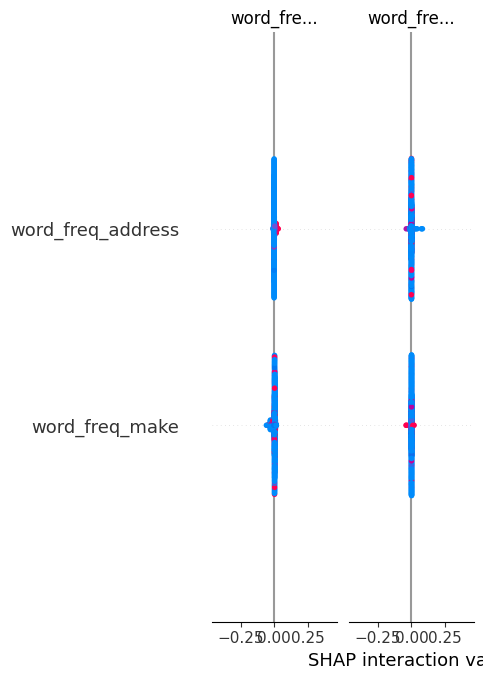

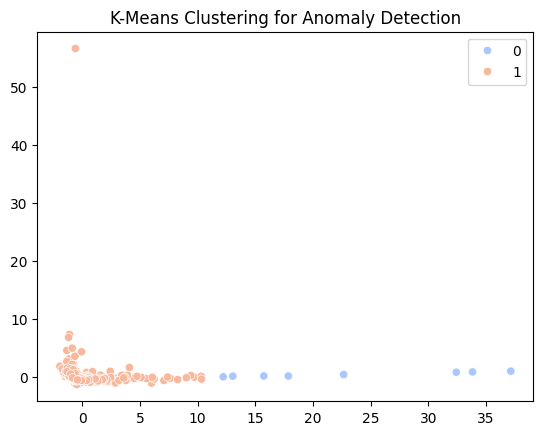

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.1994 - val_loss: 1.1496
Epoch 2/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9192 - val_loss: 1.1080
Epoch 3/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8366 - val_loss: 1.0687
Epoch 4/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9366 - val_loss: 1.0592
Epoch 5/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9417 - val_loss: 1.0510
Epoch 6/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9096 - val_loss: 1.0410
Epoch 7/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8759 - val_loss: 1.0354
Epoch 8/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8405 - val_loss: 1.0314
Epoch 9/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9338 - val_loss: 1.0287
Epoch 10/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8965 - val_loss: 1.0256
Epoch 11/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8726 - val_loss: 1.0238
Epoch 12/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

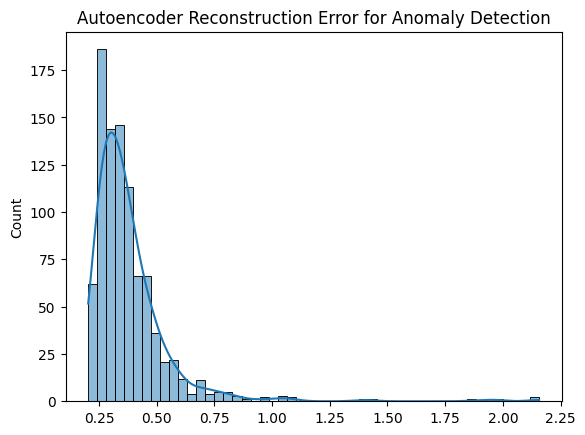

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow import keras
from tensorflow.keras import layers

# Load the dataset
df = pd.read_csv("spambase_csv.csv")

# Define features and target
X = df.drop(columns=["class"])
y = df["class"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train different classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Neural Network": MLPClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

# Feature Importance Analysis using SHAP
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

# Anomaly Detection using K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_scaled)
kmeans_preds = kmeans.predict(X_test_scaled)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_scaled)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_preds, palette='coolwarm')
plt.title("K-Means Clustering for Anomaly Detection")
plt.show()

# Anomaly Detection using Autoencoder
autoencoder = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(X_train_scaled.shape[1], activation='sigmoid')
])

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=32, validation_data=(X_test_scaled, X_test_scaled))

reconstructions = autoencoder.predict(X_test_scaled)
mse = np.mean(np.abs(reconstructions - X_test_scaled), axis=1)
sns.histplot(mse, bins=50, kde=True)
plt.title("Autoencoder Reconstruction Error for Anomaly Detection")
plt.show()
